In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

In [30]:
class Net_Xavier(nn.Module):
    def __init__(self, Layers):
        super(Net_Xavier, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.xavier_uniform_(linear.weight)
            self.hidden.append(linear)
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [37]:
class Net_Uniform(nn.Module):
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [6]:
class Net(nn.Module):
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [19]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss': [], 'validation_accuracy': []}
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            y_hat = model(x.view(-1, 28 * 28))
            _, label = torch.max(y_hat, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)
    return loss_accuracy

In [20]:
train_dataset = dsets.MNIST(root = './data', train =True, download = True, transform = transforms.ToTensor())
validation_dataset = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())

In [21]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 2000, shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 5000, shuffle = False)

In [22]:
criterion = nn.CrossEntropyLoss()

In [23]:
input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 10, 100, 10, 100, output_dim]
epochs = 15

In [24]:
model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs = epochs)

In [33]:
model_xavier = Net_Xavier(layers)
optimizer = torch.optim.SGD(model_xavier.parameters(), lr = learning_rate)
training_results_Xavier = train(model_xavier, criterion, train_loader, validation_loader, optimizer, epochs = epochs)

In [38]:
model_uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_uniform.parameters(), lr = learning_rate)
training_results_uniform = train(model_uniform, criterion, train_loader, validation_loader, optimizer, epochs = epochs)

NameError: name 'training_results_Uniform' is not defined

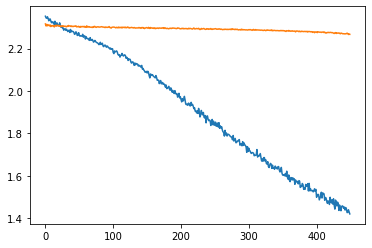

In [40]:
plt.plot(training_results_Xavier['training_loss'], label = 'Xaviar')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')  
plt.title('training loss iterations')
plt.legend()

NameError: name 'training_results_Uniform' is not defined

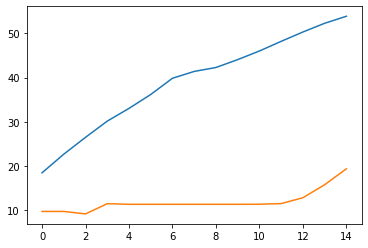

In [41]:
# Plot the accuracy

plt.plot(training_results_Xavier['validation_accuracy'], label='Xavier')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs')   
plt.legend()